In [17]:
library(readr)
library(dplyr)
library(ggplot2)
library(mvtnorm)

In [18]:
df <- readr::read_csv('data/heightWeightData.txt', col_names=c('gender', 'height', 'weight'), col_types='nnn')

In [35]:
plot_contour <- function(mu, sigma, df) {
    data.grid <- expand.grid(s.1=seq(min(df$height), max(df$height), length.out=200),
                         s.2=seq(min(df$weight), max(df$weight), length.out=200))
    q.samp <- cbind(data.grid, prob=dmvnorm(data.grid, mean=mu, sigma=sigma))
    
    return(geom_contour(data=q.samp, aes(x=s.1, y=s.2, z=prob)))
}

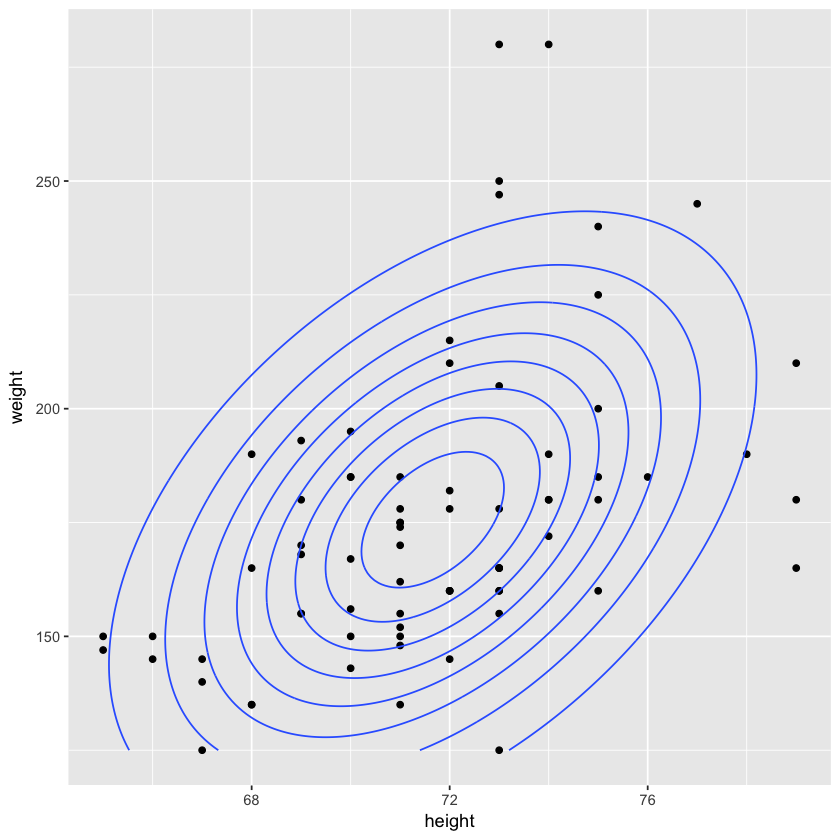

In [37]:
# Fit a 2D Gaussian to the male data
male <- df %>% filter(gender == 1) %>% select(-gender)
male_mu <- sapply(male, mean, na.rm=TRUE)
male_sigma <- cov(male)

ggplot(male, aes(height, weight)) +
    geom_point() +
    plot_contour(male_mu, male_sigma, df=male)

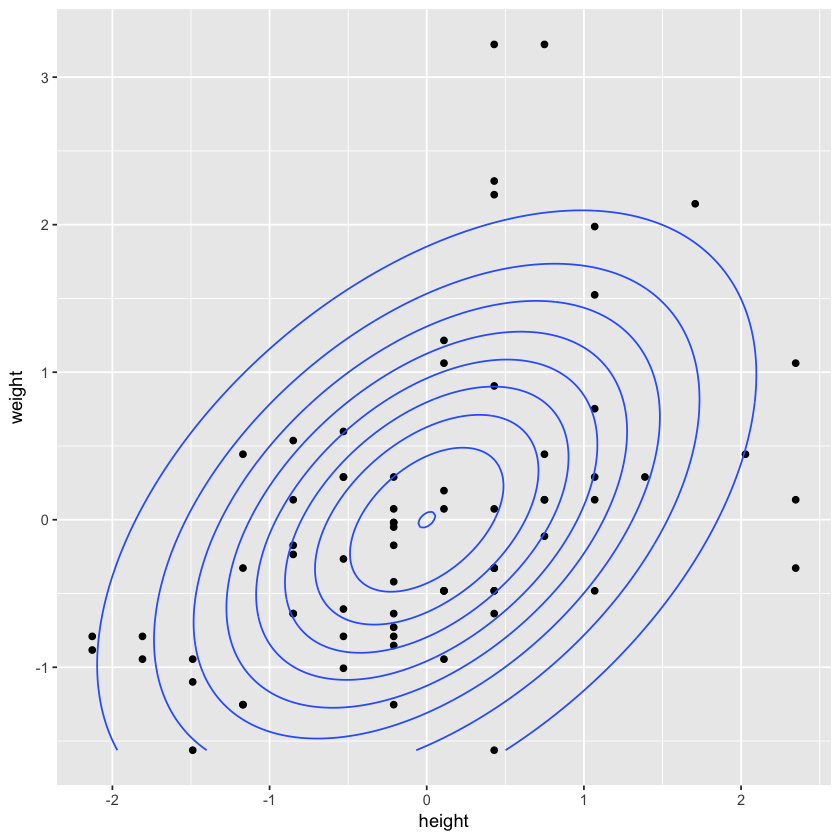

In [59]:
# Plot the same thing, but with standardized features
norm.male <- as.data.frame(sapply(male, function(x) (x - mean(x)) / sd(x)))
ggplot(norm.male, aes(height, weight)) +
    geom_point() +
    plot_contour(c(0, 0), cov(norm.male), df=norm.male)

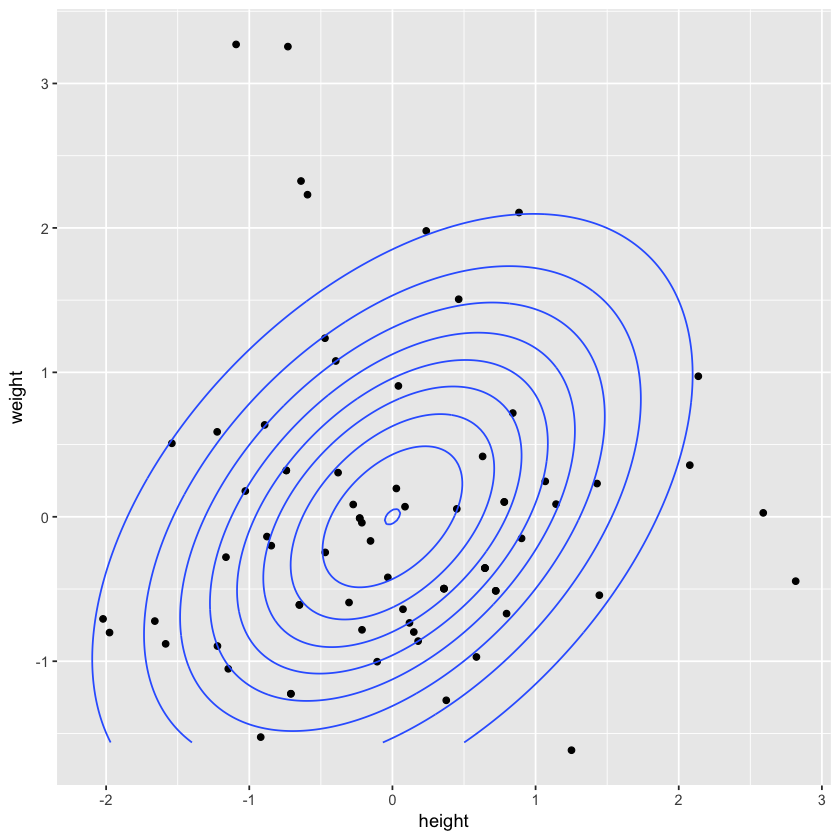

In [161]:
# Use eigenvalue decomposition to whiten the data
library(ForeCA)

male.sphere <- as.data.frame(whiten(as.matrix(male))$U)
colnames(male.sphere) <- c('height', 'weight')

ggplot(male.sphere, aes(x=height, y=weight)) +
    geom_point() +
    plot_contour(sapply(male.sphere, mean), cov(norm.male), df=norm.male)